In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [33]:
data = pd.read_csv('./abalone.csv')
data['Sex'] = data['Sex'].map({'M':0, 'F':1, 'I':2})
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [61]:
X = data.drop(['Rings'], axis=1)
y = data[['Rings']]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3132, 8) (3132, 1) (1045, 8) (1045, 1)


In [37]:
# 定义参数初始化函数
def initialize(dims):
    w = np.zeros((dims, 1))
    b = 0
    return w, b

In [38]:
# 定义ridge损失函数
def l2_loss(X, y, w, b, alpha):
    num_train = X.shape[0]
    num_feature = X.shape[1]
    y_hat = np.dot(X, w) + b
    loss = np.sum((y_hat-y)**2)/num_train + alpha*(np.sum(np.square(w)))
    dw = np.dot(X.T, (y_hat-y)) /num_train + 2*alpha*w
    db = np.sum((y_hat-y)) /num_train
    return y_hat, loss, dw, db

In [68]:
# 定义训练过程
def ridge_train(X, y, learning_rate=0.001, epochs=5000):
    loss_list = []
    w, b = initialize(X.shape[1])
    for i in range(1, epochs):
        y_hat, loss, dw, db = l2_loss(X, y, w, b, 0.1)
        w += -learning_rate * dw
        b += -learning_rate * db
        loss_list.append(loss)
        
        if i % 100 == 0:
            print('epoch %d loss %f' % (i, loss))
        params = {
            'w': w,
            'b': b
        }
        grads = {
            'dw': dw,
            'db': db
        }
    return loss, loss_list, params, grads

In [69]:
# 执行训练示例
loss, loss_list, params, grads = ridge_train(X_train, y_train, 0.01, 1000)

epoch 100 loss 12.009008
epoch 200 loss 10.278130
epoch 300 loss 9.558112
epoch 400 loss 9.105150
epoch 500 loss 8.781454
epoch 600 loss 8.540165
epoch 700 loss 8.357414
epoch 800 loss 8.218088
epoch 900 loss 8.111632


In [70]:
# 获取训练参数
params

{'b': 6.811842405055238, 'w': array([[-0.17320731],
        [ 1.1372835 ],
        [ 0.92245614],
        [ 0.35081766],
        [ 1.92472894],
        [ 0.50576768],
        [ 0.38760524],
        [ 0.76797801]])}

In [71]:
# 定义预测函数
def predict(X, params):
    w = params['w']
    b = params['b']
    
    y_pred = np.dot(X, w) + b
    return y_pred

y_pred = predict(X_test, params)
y_pred[:5]

array([[ 9.9532712 ],
       [ 9.6663585 ],
       [ 9.16269917],
       [11.32027198],
       [ 7.1519842 ]])

In [72]:
y_test[:5]

array([[10],
       [12],
       [ 8],
       [13],
       [ 6]], dtype=int64)

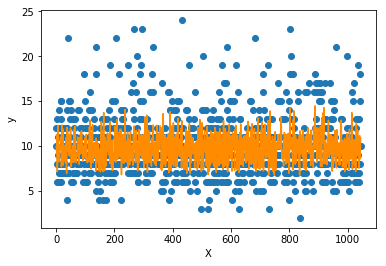

In [73]:
# 简单绘图
import matplotlib.pyplot as plt
f = X_test.dot(params['w']) + params['b']

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X')
plt.ylabel('y')
plt.show();

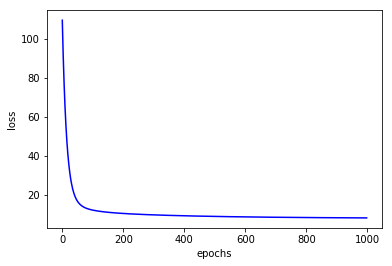

In [48]:
# 训练过程中的损失下降
plt.plot(loss_list, color = 'blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [74]:
# 导入线性模型模块
from sklearn.linear_model import Ridge
# 创建Ridge模型实例
clf = Ridge(alpha=1.0)
# 对训练集进行拟合
clf.fit(X_train, y_train)
# 打印模型相关系数
print("sklearn Ridge intercept :", clf.intercept_)
print("\nsklearn Ridge coefficients :\n", clf.coef_)

sklearn Ridge intercept : [4.10453635]

sklearn Ridge coefficients :
 [[ -0.45851193   2.18540968   8.15662431   6.93699459   6.94525282
  -17.60842372  -6.76773076  10.92235029]]


In [55]:
clf.predict(X_test)[:5]

array([[ 9.92562104],
       [ 7.84003066],
       [12.39512286],
       [11.37856456],
       [ 9.57795936]])